In [53]:
#https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook
#Comment formater un cahier
#https://www.geeksforgeeks.org/jupyter-notebook-tips-and-tricks/
#Comment mettre des commentaires

In [96]:
# Importer des bibliothèques nécessaires

#numérique
import numpy as np

#maniupulation des données
import pandas as pd

#généner des graphiques
import matplotlib.pyplot as plt

#import math function
import math as m

In [71]:
#importer les données de la chaleure spécifique
C = np.loadtxt('Cp_vs_T.txt', delimiter="\t")

#et inspecter les données
print(C)

[[2.98568980e+02 2.50422295e+01]
 [2.98223950e+02 2.50440101e+01]
 [2.98207670e+02 2.50418559e+01]
 [2.85022060e+02 2.50037737e+01]
 [2.84998880e+02 2.49964068e+01]
 [2.84819900e+02 2.49858981e+01]
 [2.72373730e+02 2.48893475e+01]
 [2.72372300e+02 2.48964515e+01]
 [2.72220350e+02 2.48880537e+01]
 [2.60292100e+02 2.46857318e+01]
 [2.60287010e+02 2.46866373e+01]
 [2.60161380e+02 2.47115215e+01]
 [2.48692930e+02 2.46153030e+01]
 [2.48688380e+02 2.46092198e+01]
 [2.48602480e+02 2.46178804e+01]
 [2.37631800e+02 2.44491039e+01]
 [2.37626030e+02 2.44569023e+01]
 [2.37554860e+02 2.44818469e+01]
 [2.27053020e+02 2.41030869e+01]
 [2.27050710e+02 2.41142308e+01]
 [2.27034590e+02 2.41101050e+01]
 [2.16953530e+02 2.39063124e+01]
 [2.16948540e+02 2.39430837e+01]
 [2.16931330e+02 2.39263625e+01]
 [2.07290470e+02 2.37590536e+01]
 [2.07282390e+02 2.37393344e+01]
 [2.07279380e+02 2.37459248e+01]
 [1.98073750e+02 2.36897875e+01]
 [1.98065700e+02 2.36944077e+01]
 [1.98046550e+02 2.36309176e+01]
 [1.892929

In [72]:
#extraire deux vecteurs
T=C[:,0]
Cp=C[:,1]

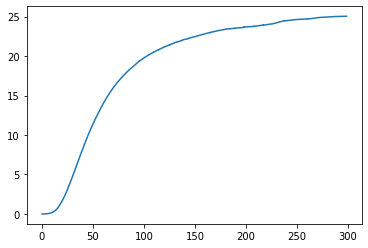

In [73]:
plt.plot(T, Cp)
plt.show()

In [74]:
#La théorie predit un chaleur spécifique avec deux contributions
#Cp=gT+bT^3, donc pour avoir une ligne droite nous devons reformuler les données:
#Cp/T=g+bT^2
T2=T*T
CpdivT=Cp/T

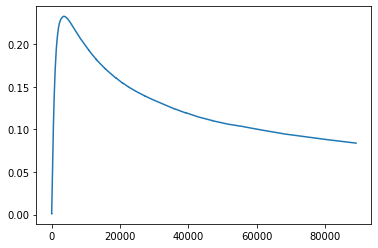

In [75]:
#inspecter les données transformées
plt.plot(T2, CpdivT)
plt.show()

In [76]:
#selectionner la bonne section en températures
#https://docs.scipy.org/doc/numpy-1.5.x/reference/arrays.indexing.html
low_T2 = T2[T2 < 100]
print('low_T2',len(low_T2))
print(low_T2)

low_T2 76
[8.79400607e+01 8.47014580e+01 7.37422674e+01 6.80130304e+01
 6.14522633e+01 5.44175102e+01 5.14002863e+01 4.30572009e+01
 4.29935763e+01 3.60172233e+01 3.42840697e+01 3.00709920e+01
 2.72111816e+01 2.50639859e+01 2.15174060e+01 2.08857976e+01
 1.73542421e+01 1.69861284e+01 1.43721450e+01 1.33378841e+01
 1.18775689e+01 1.04825588e+01 9.90056357e+00 8.20780958e+00
 8.13954738e+00 6.69476192e+00 6.37743909e+00 5.47516898e+00
 4.92198984e+00 4.49125998e+00 3.80545131e+00 3.64866729e+00
 2.96506255e+00 2.91613239e+00 2.41123008e+00 2.23701140e+00
 1.99218207e+00 1.95368466e+00 1.71076433e+00 1.67417695e+00
 1.58801406e+00 1.40378824e+00 1.30953006e+00 1.28675514e+00
 1.04135269e+00 1.02497421e+00 8.64312414e-01 7.95199015e-01
 7.81474140e-01 6.99124832e-01 6.07989852e-01 5.96620483e-01
 5.68814156e-01 4.63774171e-01 4.60818491e-01 4.56733024e-01
 3.73747367e-01 3.54412070e-01 3.48790477e-01 3.05265499e-01
 2.70752217e-01 2.68159073e-01 2.45697027e-01 2.03836403e-01
 2.01349297e-0

In [77]:
last=len(T2)
print('last',last)
l_low_T2=len(low_T2)
beg=last-l_low_T2
print(beg)
low_CpdivT=CpdivT[beg:]
print('low_CpdivT',len(low_CpdivT))

last 186
110
low_CpdivT 76


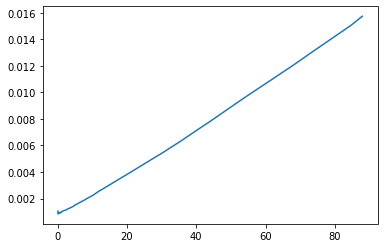

In [78]:
plt.plot(low_T2, low_CpdivT)
plt.show()

In [79]:
#ajuster un polynome aux données, dans notre cas une ligne droite.
#https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python
m,b=np.polyfit(low_T2, low_CpdivT, 1)
print(m)
print(b)

0.00016455644782894157
0.0007616995647103781


(0, 0.025)

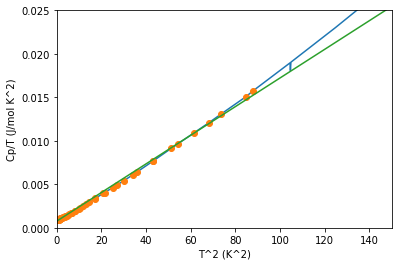

In [80]:
plt.axis(limits)
plt.plot(T2,CpdivT)
plt.plot(low_T2, low_CpdivT, 'o')
plt.plot(T2, m*T2 + b)
#Ajouter la designation des axes
#https://www.kite.com/python/answers/how-to-add-axis-labels-to-a-plot-in-matplotlib-in-python
plt.xlabel("T^2 (K^2)")
plt.ylabel("Cp/T (J/mol K^2)")
#Faire un Zoom sur les données en dessous de 0.75 J/mol K^2
#https://www.kite.com/python/answers/how-to-set-axis-ranges-in-matplotlib-in-python
plt.xlim(0,150)
plt.ylim(0,0.025)

In [87]:
p = np.polynomial.Chebyshev.fit(T, Cp, 25)

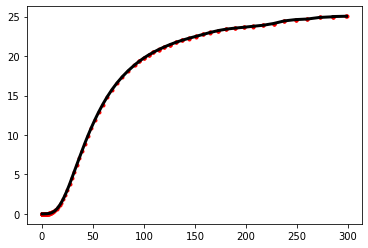

In [88]:
plt.plot(T, Cp, 'r.')
plt.plot(T, p(T), 'k-', lw=3)
plt.show()

In [89]:
pCp=p(T)

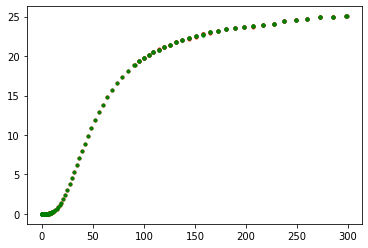

In [90]:
plt.plot(T, Cp, 'r.')
plt.plot(T, pCp, 'g.')
plt.show()

In [91]:
dCp=(Cp-pCp)/Cp

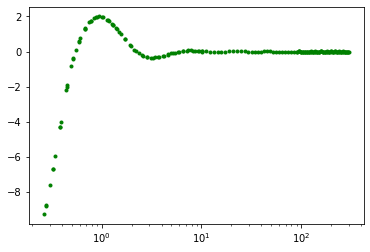

In [92]:
plt.semilogx(T,dCp,'g.')

In [101]:
lnT=numpy.log(T)

NameError: name 'numpy' is not defined

In [99]:
lnCp=m.log(Cp)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
lp= np.polynomial.Chebyshev.fit(lnT, lnCp, 25)

In [ ]:
plnCp=lp(lnT)

In [ ]:
plt.plot(lnT, lnCp, 'r.')
plt.plot(lT, plnCp, 'g.')
plt.show()